In [49]:
import os
import json
import numpy as np
import pandas as pd
import networkx as nx
import keplergl
from helpers.helperFunctions import readJSONDiGraph, lineElevationProfile, euclideanDistance
from shapely.geometry import Point, MultiPoint

In [2]:
filename = "data/roadNetwork-combined-v6.json"
with open(filename, encoding='utf-8-sig') as f:
    js_graph = json.load(f)

In [3]:
links = pd.DataFrame(js_graph['links'])
nodes = pd.DataFrame(js_graph['nodes'])

In [4]:
links.isnull().sum() / links.shape[0]

roadType         0.000000
roadName         0.000000
oneWay           0.000000
speedLimit       0.000000
roadWidth        0.000000
driveSpeed       0.000000
capacity         0.000000
numLanes         0.000000
modality         0.000000
x1               0.000000
y1               0.000000
x2               0.000000
y2               0.000000
distance         0.000000
timeWeight       0.000000
elevationGain    0.378355
source           0.000000
target           0.000000
dtype: float64

In [5]:
nodes.isnull().sum() / nodes.shape[0]

lat          0.000000
lon          0.000000
modality     0.000000
elevation    0.000000
id           0.000000
thisPoint    0.172227
dtype: float64

In [6]:
nodes.shape, links.shape

((1175218, 6), (2547815, 18))

In [7]:
import keplergl

In [28]:
kmap = keplergl.KeplerGl(height=400, 
                                            data={"Links": links.loc[:, ['x1', 'y1', 'x2', 'y2', 'elevationGain', 'roadType', 'capacity']],
                                                        "Nodes": nodes.loc[:, ['id', 'lat', 'lon', 'elevation']]})

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [29]:
kmap.save_to_html(file_name="ultimate_roads.html")

Map saved to ultimate_roads.html!


In [14]:
type(links.iloc[0, :].loc['source'])

numpy.int64

In [15]:
nodes.to_csv("data/filtered-nodeData-TokyoArea-v6.csv", index=False)
links.to_csv("data/filtered-linkData-TokyoArea-v6.csv", index=False)

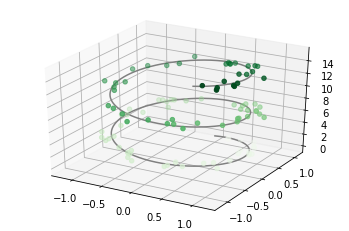

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [2]:
filename = "data/roadNetwork-combined-with-cost-v6.json"
G = readJSONDiGraph(filename)

In [35]:
list(G.nodes(data=True))[0]

(31236733,
 {'lat': 35.64379520000001,
  'lon': 139.7578,
  'modality': 'road',
  'elevation': 3.5899999141693115})

In [37]:
list(G.edges(data=True))[0]

(31236733,
 621545916,
 {'roadType': 'motorway',
  'roadName': '首都高速11号台場線',
  'oneWay': 1,
  'speedLimit': 80,
  'roadWidth': 21.0,
  'driveSpeed': 60,
  'capacity': 24000,
  'numLanes': 3,
  'modality': 'road',
  'x1': 139.7578,
  'y1': 35.64379520000001,
  'x2': 139.7578196,
  'y2': 35.6417602,
  'distance': 0,
  'timeWeight': 0.0,
  'elevationGain': -0.49000000953674316,
  'cost': 0.0})

In [42]:
G.edges[31236733, 621545916]['distance']

0

In [43]:
from helpers.helperFunctions import getClosestPoint

ImportError: cannot import name 'getClosestPoint'

In [53]:
len(G.edges()), len(G.nodes())

(2547815, 1175218)

In [ ]:
nodes = pd.concat([pd.DataFrame(node[1], )])

In [55]:
testNode = list(G.nodes(data=True))[0]
testNode

(31236733,
 {'lat': 35.64379520000001,
  'lon': 139.7578,
  'modality': 'road',
  'elevation': 3.5899999141693115})

In [7]:
theData = [{'id': node[0], **node[1]} for node in list(G.nodes(data=True))]

In [8]:
nodes = pd.DataFrame(theData)

In [9]:
nodes

,id,lat,lon,modality,elevation,thisPoint
0,31236733,35.643795,139.757800,road,3.590000,NaN
1,621545916,35.641760,139.757820,road,3.100000,NaN
2,621545917,35.640670,139.757833,road,2.940000,NaN
3,31236732,35.639852,139.757831,road,2.520000,NaN
4,1832774251,35.639592,139.757840,road,2.490000,NaN
...,...,...,...,...,...,...
1175213,7589504793,35.505771,139.561379,road,27.129999,POINT (139.5613794 35.50577070000001)
1175214,7590138379,35.509055,139.571120,road,23.230000,POINT (139.5711198 35.50905460000001)
1175215,7590140392,35.506309,139.567525,road,20.629999,POINT (139.567525 35.506309)
1175216,7590140394,35.508689,139.565425,road,33.169998,POINT (139.5654255 35.50868939999999)


In [137]:
def getClosestPoint(thisLat, thisLon, pointsDataframe):
    from shapely.ops import nearest_points
    thisPoint = Point(thisLon, thisLat)
    pointsDataframe.loc[:,'PointCoords'] = pointsDataframe.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
    pointsGeoms = MultiPoint(list(pointsDataframe['PointCoords']))
    pointsDataframe = pointsDataframe[pointsDataframe['PointCoords'] == nearest_points(thisPoint, pointsGeoms)[1]]
    return pointsDataframe.index.values[0]

In [138]:
import time
start = time.time()
nearest_point = getClosestPoint(35.640671, 139.757831, nodes)  #621545917
elapsed = time.time() - start
print(f"Time: {elapsed} seconds")

Time: 71.19611811637878 seconds


In [139]:
nearest_point

2

In [11]:
def nearestPoint(originLat, originLon, nodes):
    dists = np.array([euclideanDistance(originLon, originLat, lon, lat) for lon, lat in zip(nodes.lon, nodes.lat)])
    return dists.argmin()

In [14]:
nodes.iloc[nearestPoint(35.640671, 139.757831, nodes), :].id

621545917

In [15]:
nodes

,id,lat,lon,modality,elevation,thisPoint
0,31236733,35.643795,139.757800,road,3.590000,NaN
1,621545916,35.641760,139.757820,road,3.100000,NaN
2,621545917,35.640670,139.757833,road,2.940000,NaN
3,31236732,35.639852,139.757831,road,2.520000,NaN
4,1832774251,35.639592,139.757840,road,2.490000,NaN
...,...,...,...,...,...,...
1175213,7589504793,35.505771,139.561379,road,27.129999,POINT (139.5613794 35.50577070000001)
1175214,7590138379,35.509055,139.571120,road,23.230000,POINT (139.5711198 35.50905460000001)
1175215,7590140392,35.506309,139.567525,road,20.629999,POINT (139.567525 35.506309)
1175216,7590140394,35.508689,139.565425,road,33.169998,POINT (139.5654255 35.50868939999999)


In [18]:
nx.number_weakly_connected_components(G)

1829

In [19]:
component_lens = [len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]

In [20]:
component_lens

[1144294,
 414,
 404,
 382,
 373,
 358,
 357,
 336,
 316,
 310,
 279,
 250,
 242,
 207,
 183,
 174,
 161,
 161,
 159,
 151,
 143,
 137,
 137,
 131,
 129,
 125,
 125,
 124,
 122,
 120,
 117,
 116,
 114,
 109,
 104,
 100,
 99,
 96,
 95,
 93,
 88,
 88,
 88,
 83,
 82,
 81,
 79,
 78,
 78,
 77,
 76,
 75,
 74,
 74,
 74,
 74,
 74,
 73,
 72,
 71,
 70,
 69,
 68,
 68,
 68,
 66,
 65,
 64,
 64,
 64,
 64,
 63,
 63,
 63,
 63,
 62,
 62,
 60,
 60,
 59,
 59,
 58,
 58,
 58,
 58,
 57,
 56,
 56,
 56,
 55,
 54,
 54,
 54,
 53,
 53,
 53,
 53,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 51,
 51,
 51,
 51,
 50,
 50,
 50,
 50,
 49,
 49,
 49,
 49,
 49,
 48,
 48,
 48,
 48,
 47,
 47,
 47,
 47,
 47,
 47,
 46,
 46,
 46,
 46,
 46,
 45,
 45,
 45,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 44,
 43,
 43,
 43,
 43,
 42,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 40,
 40,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 37,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 36,


In [21]:
len(G.nodes)

1175218

In [22]:
1144294 / 1175218

0.9736865841060978

In [23]:
# How many components are not because of the pedestrian?
components = [c for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]

In [39]:
leftovers = np.array(components[1:])
flatten = lambda l: [item for sublist in l for item in sublist]
flat_leftovers = set(flatten(leftovers))

In [35]:
links = pd.read_csv("data/filtered-linkData-TokyoArea-v6.csv")
links

/Users/s_araki/.pyenv/versions/3.6.5/envs/geoanalysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,roadType,roadName,oneWay,speedLimit,roadWidth,driveSpeed,capacity,numLanes,modality,x1,y1,x2,y2,distance,timeWeight,elevationGain,source,target
0,motorway,首都高速11号台場線,1,80.0,21,60,24000,3,road,139.757800,35.643795,139.757820,35.641760,0,0.0,-0.490000,31236733,621545916
1,motorway,首都高速11号台場線,1,80.0,21,60,24000,3,road,139.757820,35.641760,139.757833,35.640670,0,0.0,-0.160000,621545916,621545917
2,motorway,首都高速11号台場線,1,80.0,21,60,24000,3,road,139.757833,35.640670,139.757831,35.639852,0,0.0,-0.420000,621545917,31236732
3,motorway,首都高速11号台場線,1,80.0,21,60,24000,3,road,139.757831,35.639852,139.757840,35.639592,0,0.0,-0.030000,31236732,1832774251
4,motorway,首都高速11号台場線,1,80.0,21,60,24000,3,road,139.757840,35.639592,139.757854,35.639448,0,0.0,0.000000,1832774251,1832774248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547810,residential,NaN,0,6.0,4,6,500,1,road,139.571120,35.509055,139.571403,35.508881,0,0.0,7.880001,7590138379,7590138378
2547811,residential,NaN,0,6.0,4,6,500,1,road,139.567870,35.506318,139.567525,35.506309,0,0.0,NaN,7590140392,1391658116
2547812,residential,NaN,0,6.0,4,6,500,1,road,139.565425,35.508689,139.565562,35.508779,0,0.0,-1.269999,7590140394,7590140393
2547813,residential,NaN,0,6.0,4,6,500,1,road,139.565562,35.508779,139.565608,35.508829,0,0.0,0.000000,7590140393,1615202001


In [46]:
is_member = lambda row: row.source in flat_leftovers or row.target in flat_leftovers
edgeDF = links.loc[links.apply(is_member, axis=1)]

In [47]:
edgeDF

,roadType,roadName,oneWay,speedLimit,roadWidth,driveSpeed,capacity,numLanes,modality,x1,y1,x2,y2,distance,timeWeight,elevationGain,source,target
186,motorway_link,首都高速湾岸線,1,60.0,10.5,40,8000,1,road,139.783017,35.632141,139.783126,35.632038,0,0.0,-1.260000,31252923,31252922
187,motorway_link,首都高速湾岸線,1,60.0,10.5,40,8000,1,road,139.783126,35.632038,139.783214,35.631941,0,0.0,-0.100000,31252922,7473455022
188,motorway_link,首都高速湾岸線,1,60.0,10.5,40,8000,1,road,139.783214,35.631941,139.783287,35.631853,0,0.0,1.370000,7473455022,3762520683
189,motorway_link,首都高速湾岸線,1,60.0,10.5,40,8000,1,road,139.783287,35.631853,139.783344,35.631773,0,0.0,-0.370000,3762520683,7473455023
190,motorway_link,首都高速湾岸線,1,60.0,10.5,40,8000,1,road,139.783344,35.631773,139.783401,35.631681,0,0.0,-0.080000,7473455023,7473455024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547115,pedestrian,NaN,0,6.0,6,10,500,1,road,139.475035,35.562288,139.474952,35.562238,0,0.0,-0.050003,7503133119,7503133118
2547116,pedestrian,NaN,0,6.0,6,10,500,1,road,139.475078,35.562308,139.475035,35.562288,0,0.0,NaN,7503133119,7503133120
2547117,pedestrian,NaN,0,6.0,6,10,500,1,road,139.474952,35.562238,139.474896,35.562209,0,0.0,-0.129997,7503133118,7503133117
2547118,pedestrian,NaN,0,6.0,6,10,500,1,road,139.475035,35.562288,139.474952,35.562238,0,0.0,NaN,7503133118,7503133119


In [50]:
kmap = keplergl.KeplerGl(height=400,
                                            data={'Links': edgeDF})
kmap.save_to_html(file_name="leftover_components.html")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to leftover_components.html!


In [51]:
largest_component = components[0]
len(largest_component)

1144294

In [55]:
is_member = lambda row: row.source in largest_component or row.target in largest_component
primary = links.loc[links.apply(is_member, axis=1)]

In [57]:
primary.to_csv("data/primaryLinkData.csv", index=False)

In [58]:
primaryNodes = nodes.loc[nodes.apply(lambda row: row.id in largest_component, axis=1)]

In [64]:
primaryNodes = primaryNodes.iloc[:, :-1]

In [65]:
primaryNodes.to_csv("data/primaryNodeData.csv", index=False)

In [66]:
primary.shape

(2487548, 18)

In [67]:
primaryNodes.shape

(1144294, 5)

In [68]:
primary

,roadType,roadName,oneWay,speedLimit,roadWidth,driveSpeed,capacity,numLanes,modality,x1,y1,x2,y2,distance,timeWeight,elevationGain,source,target
0,motorway,首都高速11号台場線,1,80.0,21,60,24000,3,road,139.757800,35.643795,139.757820,35.641760,0,0.0,-0.490000,31236733,621545916
1,motorway,首都高速11号台場線,1,80.0,21,60,24000,3,road,139.757820,35.641760,139.757833,35.640670,0,0.0,-0.160000,621545916,621545917
2,motorway,首都高速11号台場線,1,80.0,21,60,24000,3,road,139.757833,35.640670,139.757831,35.639852,0,0.0,-0.420000,621545917,31236732
3,motorway,首都高速11号台場線,1,80.0,21,60,24000,3,road,139.757831,35.639852,139.757840,35.639592,0,0.0,-0.030000,31236732,1832774251
4,motorway,首都高速11号台場線,1,80.0,21,60,24000,3,road,139.757840,35.639592,139.757854,35.639448,0,0.0,0.000000,1832774251,1832774248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547810,residential,NaN,0,6.0,4,6,500,1,road,139.571120,35.509055,139.571403,35.508881,0,0.0,7.880001,7590138379,7590138378
2547811,residential,NaN,0,6.0,4,6,500,1,road,139.567870,35.506318,139.567525,35.506309,0,0.0,NaN,7590140392,1391658116
2547812,residential,NaN,0,6.0,4,6,500,1,road,139.565425,35.508689,139.565562,35.508779,0,0.0,-1.269999,7590140394,7590140393
2547813,residential,NaN,0,6.0,4,6,500,1,road,139.565562,35.508779,139.565608,35.508829,0,0.0,0.000000,7590140393,1615202001


In [85]:
def generate_shortest_path_df(paths, links):
    result = {}
    ans = []
    index = 1
    # paths: list of lists
    for path in paths:
        for i in range(len(path)-1):
            source = path[i]
            target = path[i + 1]
            link = links.loc[(links.source == source) & (links.target == target)]
            ans.append(link)
        result[f"path_{index}"] = pd.concat(ans)
        index += 1
    for path_type, s_path in result.items():
        s_path.loc[:, 'pathId'] = path_type
    return pd.concat(result.values())

In [86]:
generate_shortest_path_df(paths, primary)

,roadType,roadName,oneWay,speedLimit,roadWidth,driveSpeed,capacity,numLanes,modality,x1,y1,x2,y2,distance,timeWeight,elevationGain,source,target,pathId
383819,tertiary,旧渋谷川遊歩道路（キャットストリート）,0,30.0,6.0,30,4000,1,road,139.704453,35.665546,139.704645,35.665636,0,0.0,-0.160000,517470259,2078337676,path_1
383821,tertiary,旧渋谷川遊歩道路（キャットストリート）,0,30.0,6.0,30,4000,1,road,139.704039,35.665356,139.704453,35.665546,0,0.0,-0.040001,2078337676,517546592,path_1
383823,tertiary,旧渋谷川遊歩道路（キャットストリート）,0,30.0,6.0,30,4000,1,road,139.703885,35.665298,139.704039,35.665356,0,0.0,0.090000,517546592,1522928021,path_1
383825,tertiary,旧渋谷川遊歩道路（キャットストリート）,0,30.0,6.0,30,4000,1,road,139.703779,35.665225,139.703885,35.665298,0,0.0,0.050001,1522928021,1522928020,path_1
383827,tertiary,旧渋谷川遊歩道路（キャットストリート）,0,30.0,6.0,30,4000,1,road,139.703672,35.665145,139.703779,35.665225,0,0.0,-0.050001,1522928020,1522928019,path_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185725,tertiary,小豆沢通り,0,30.0,5.5,30,4000,1,road,139.695704,35.776681,139.696702,35.777149,0,0.0,0.370001,1310341840,1310342517,path_2
274353,tertiary,小豆沢通り,0,30.0,5.5,30,4000,1,road,139.695516,35.776597,139.695704,35.776681,0,0.0,0.059999,1310342517,1310341656,path_2
274356,tertiary,小豆沢通り,0,30.0,5.5,30,4000,1,road,139.695516,35.776597,139.694992,35.776333,0,0.0,-0.520000,1310341656,6192126231,path_2
248730,tertiary,小豆沢通り,0,30.0,5.5,30,4000,1,road,139.694992,35.776333,139.694882,35.776311,0,0.0,0.000000,6192126231,1884574901,path_2


In [91]:
links.loc[(links.target == 1522967624)]

,roadType,roadName,oneWay,speedLimit,roadWidth,driveSpeed,capacity,numLanes,modality,x1,y1,x2,y2,distance,timeWeight,elevationGain,source,target
204587,tertiary,キャットストリート,1,30.0,5.5,30,4000,1,road,139.703019,35.664482,139.703287,35.664768,0,0.0,0.68,1522967565,1522967624


In [93]:
big_links = pd.read_csv("data/filtered-elevationLinkData-TokyoArea-v6.csv")
big_links.isnull().sum() / big_links.shape[0]

/Users/s_araki/.pyenv/versions/3.6.5/envs/geoanalysis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


roadType         0.000000
roadName         0.886137
oneWay           0.000000
speedLimit       0.000000
roadWidth        0.000000
driveSpeed       0.000000
capacity         0.000000
numLanes         0.000000
modality         0.000000
x1               0.000000
y1               0.000000
x2               0.000000
y2               0.000000
distance         0.000000
timeWeight       0.000000
elevationGain    0.000000
source           0.000000
target           0.000000
dtype: float64

In [101]:
big_nodes = pd.read_csv("data/filtered-nodeData-TokyoArea-v6.csv").iloc[:, :5]
big_nodes.isnull().sum() / big_nodes.shape[0]

lat          0.0
lon          0.0
modality     0.0
elevation    0.0
id           0.0
dtype: float64

In [102]:
big_nodes.to_csv("data/filtered-nodeData-TokyoArea-v6.csv", index=False)